In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [96]:
dogs = "../images/dog"
cats = "../images/cat"

In [97]:
def dog_data():
    data_dog = []
    for image in tqdm(os.listdir(dogs)):
        path = os.path.join(dogs, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))
        data_dog.append(img) 
    return data_dog

In [98]:
def cat_data():
    data_cat = []
    for image in tqdm(os.listdir(cats)):
        path = os.path.join(cats, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (128, 128))
        data_cat.append(np.array(img)) 
    return data_cat

In [99]:
dog_data = dog_data()
cat_data = cat_data()

100%|██████████| 12500/12500 [00:44<00:00, 282.56it/s]


In [100]:
X = np.concatenate((dog_data, cat_data), axis=0)
X = (X-np.min(X))/(np.max(X)-np.min(X))

In [101]:
z1 = np.zeros(8500)
o1 = np.ones(8500)
y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(4000)
o = np.ones(4000)
y_test = np.concatenate((o, z), axis=0)

y = np.concatenate((y_train,y_test),axis=0)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [103]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

In [105]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\satwi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

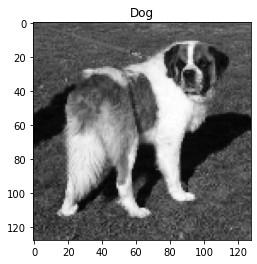

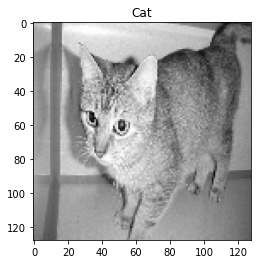

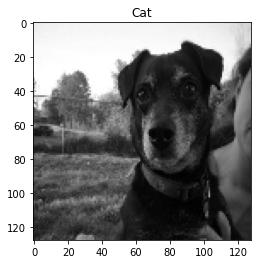

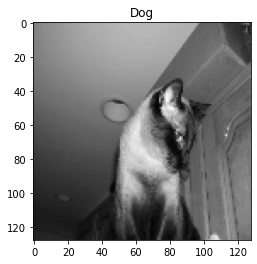

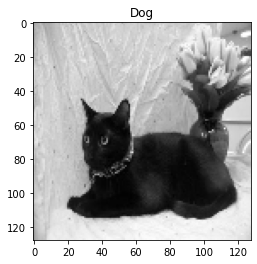

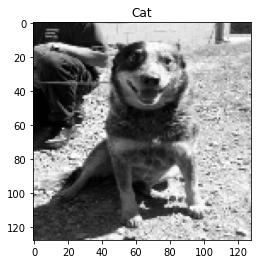

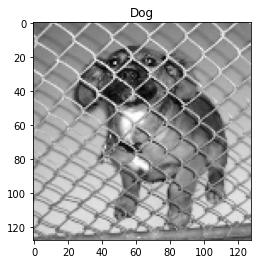

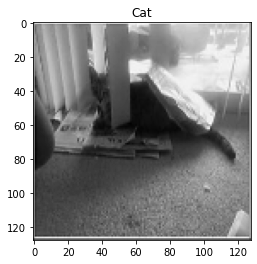

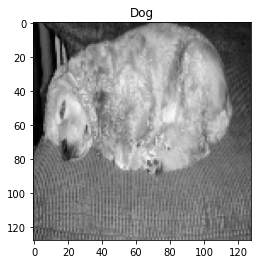

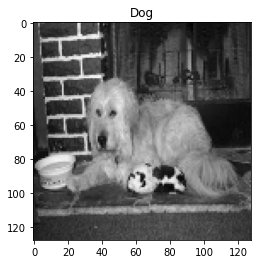

0.5021333333333333

In [106]:
ans = model.predict(X_test[:10])
ans = list(map(lambda x: "Dog" if x else "Cat", ans))

for i in range(len(ans)):
    plt.imshow(X_test[i].reshape(128, 128), cmap='gray')
    plt.title(ans[i])
    plt.show()
    
model.score(X_test, y_test)